## The Project Aim
The project aims to provide you with a unique experience in utilizing and improving your datascience skills on a real-world task of stroke prediction and reporting your results in a paper-stylereport.

## The Project: Stroke Prediction
The blockage or burst of a blood vessel in the brain is called a stroke, sometimes called a brainattack. As a result of a stroke, parts of the brain become damaged or die, which may cause long-term brain damage, disability, or death. Stroke is the second leading cause ofdeath in the world, and metabolic risks (like high blood pressure, high body-mass index (BMI), orhigh cholesterol) and behavioral factors (such as smoking, poor diet, and low physical activity) mayincrease one’s chances of having a stroke.

## The Task
Given some clinical features, the task is to predict stroke events.

## The Datasets
The DatasetsThis project uses two publicly available datasets from the Kaggle.

1.Real-world data: The Stroke Prediction Dataset
•https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

2.Synthetic data: The Synthetic Stroke Prediction Dataset
•https://www.kaggle.com/competitions/playground-series-s3e2/data

•This dataset was generated from a deep learning model trained on the Stroke Prediction Dataset.

## Preparing The Tools
I'm going to start by importing all of the python libraries that I will need for the duration of this project.

In [1]:
# EDA and plotting libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Scikit-Learn 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [2]:
# Read the datasets
stroke_prediction_train_data = pd.read_csv(r'C:\Users\furka\Documents\GitHub\stroke-prediction\train.csv')
stroke_prediction_test_data = pd.read_csv(r'C:\Users\furka\Documents\GitHub\stroke-prediction\test.csv')
stroke_prediction_train_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15299,15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0
15302,15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0


## Exploratory Data Analysis (EDA)
Before I start training the model, I want to check for missing, numeric, or misleading values in my dataset.

In [3]:
# check missing value
stroke_prediction_train_data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [4]:
stroke_prediction_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [5]:
# find useless values so as not to be mistaken
cat = stroke_prediction_train_data.select_dtypes(include=['object'])
for col in cat.columns:
    print('*' * 20 +  str(col) + '*' * 20)
    print(stroke_prediction_train_data[col].unique())
    print()
    print()

********************gender********************
['Male' 'Female' 'Other']


********************ever_married********************
['Yes' 'No']


********************work_type********************
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


********************Residence_type********************
['Urban' 'Rural']


********************smoking_status********************
['never smoked' 'formerly smoked' 'Unknown' 'smokes']




In [6]:
stroke_prediction_train_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


## Visulation

In [10]:
# check the "unknown" and "others" misleading variables in gender and smoking_status
# drop 'other' and 'unknown' values on columns to avoid wrong predict
#stroke_prediction_train_data = stroke_prediction_train_data.drop(stroke_prediction_train_data[stroke_prediction_train_data['gender'] == 'Other'].index)
#stroke_prediction_test_data = stroke_prediction_test_data.drop(stroke_prediction_test_data[stroke_prediction_test_data['gender'] == 'Other'].index)
#stroke_prediction_train_data = stroke_prediction_train_data.drop(stroke_prediction_train_data[stroke_prediction_train_data['smoking_status'] == 'Unknown'].index)
#stroke_prediction_test_data = stroke_prediction_test_data.drop(stroke_prediction_test_data[stroke_prediction_test_data['smoking_status'] == 'Unknown'].index)
stroke_prediction_train_data.drop("id", axis=1, inplace=True)
stroke_prediction_train_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0
15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0


C:\Users\furka\AppData\Local\Temp\ipykernel_15892\3422935752.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = stroke_prediction_train_data.corr().abs()


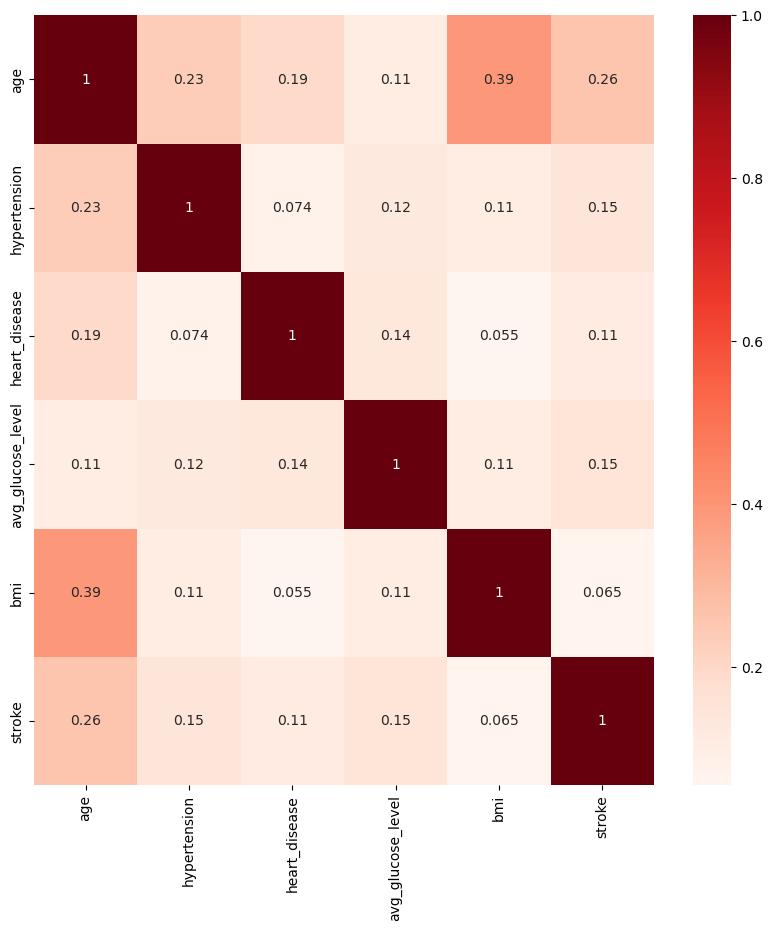

In [11]:
# create correlation matrix with abs values
corr_matrix = stroke_prediction_train_data.corr().abs()

# change this value as needed, if 0.5 does not work for your scenario
# threshold = 0.5

filtered_corr_df = corr_matrix

plt.figure(figsize=(10,10))
sns.heatmap(filtered_corr_df, annot=True, cmap="Reds")
plt.show()

<Axes: xlabel='avg_glucose_level', ylabel='Density'>

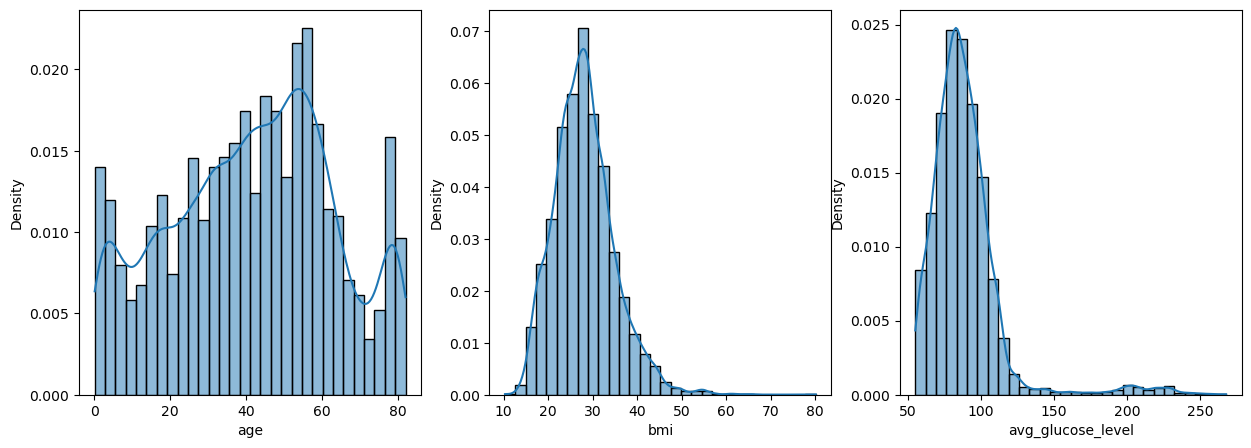

In [12]:
# Check the distribution of the numerical variables
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)
sns.histplot(x="age", data=stroke_prediction_train_data, bins=30, ax=axes[0], kde = True, stat = "density", linewidth=1)
sns.histplot(x="bmi", data=stroke_prediction_train_data, bins=30, ax=axes[1], kde = True, stat = "density", linewidth=1)
sns.histplot(x="avg_glucose_level", data=stroke_prediction_train_data, bins=30, ax=axes[2], kde = True, stat = "density", linewidth=1)

<Axes: xlabel='smoking_status', ylabel='count'>

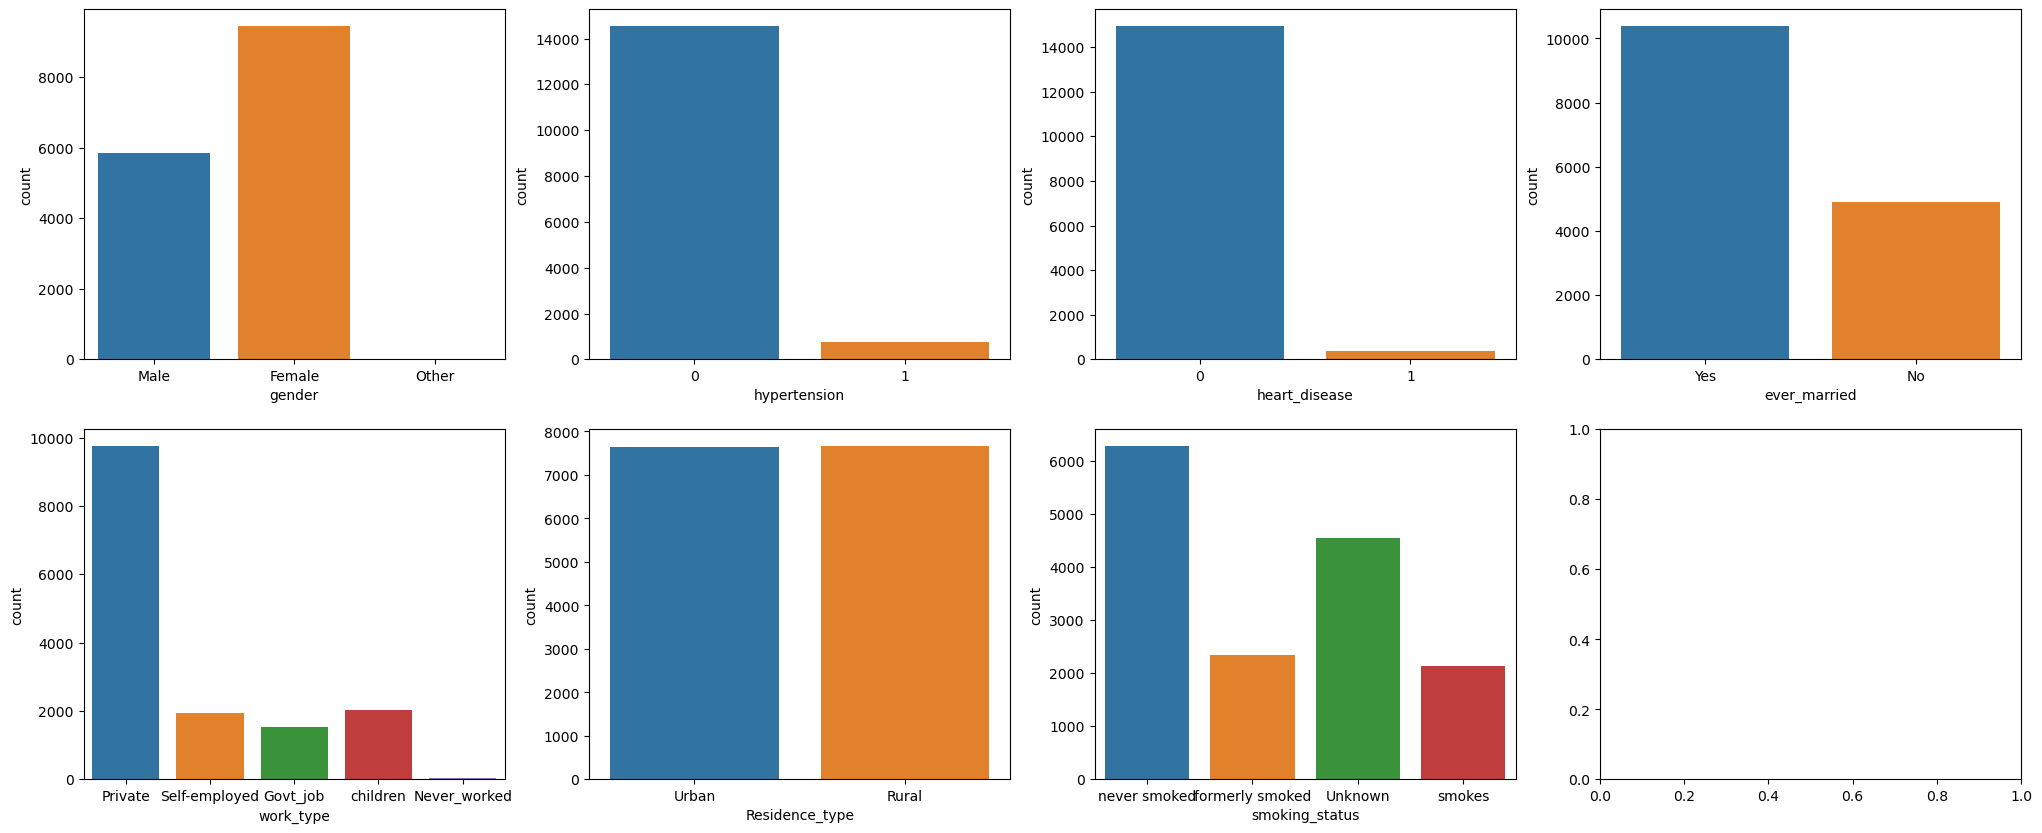

In [13]:
# Check the distribution of the categorical variables
fig, axes = plt.subplots(2, 4, figsize=(25, 10), sharey=False)
sns.countplot(x="gender", data=stroke_prediction_train_data, ax=axes[0,0])
sns.countplot(x="hypertension", data=stroke_prediction_train_data, ax=axes[0,1])
sns.countplot(x="heart_disease", data=stroke_prediction_train_data, ax=axes[0,2])
sns.countplot(x="ever_married", data=stroke_prediction_train_data, ax=axes[0,3])
sns.countplot(x="work_type", data=stroke_prediction_train_data, ax=axes[1,0])
sns.countplot(x="Residence_type", data=stroke_prediction_train_data, ax=axes[1,1])
sns.countplot(x="smoking_status", data=stroke_prediction_train_data, ax=axes[1,2])

<Axes: xlabel='stroke', ylabel='count'>

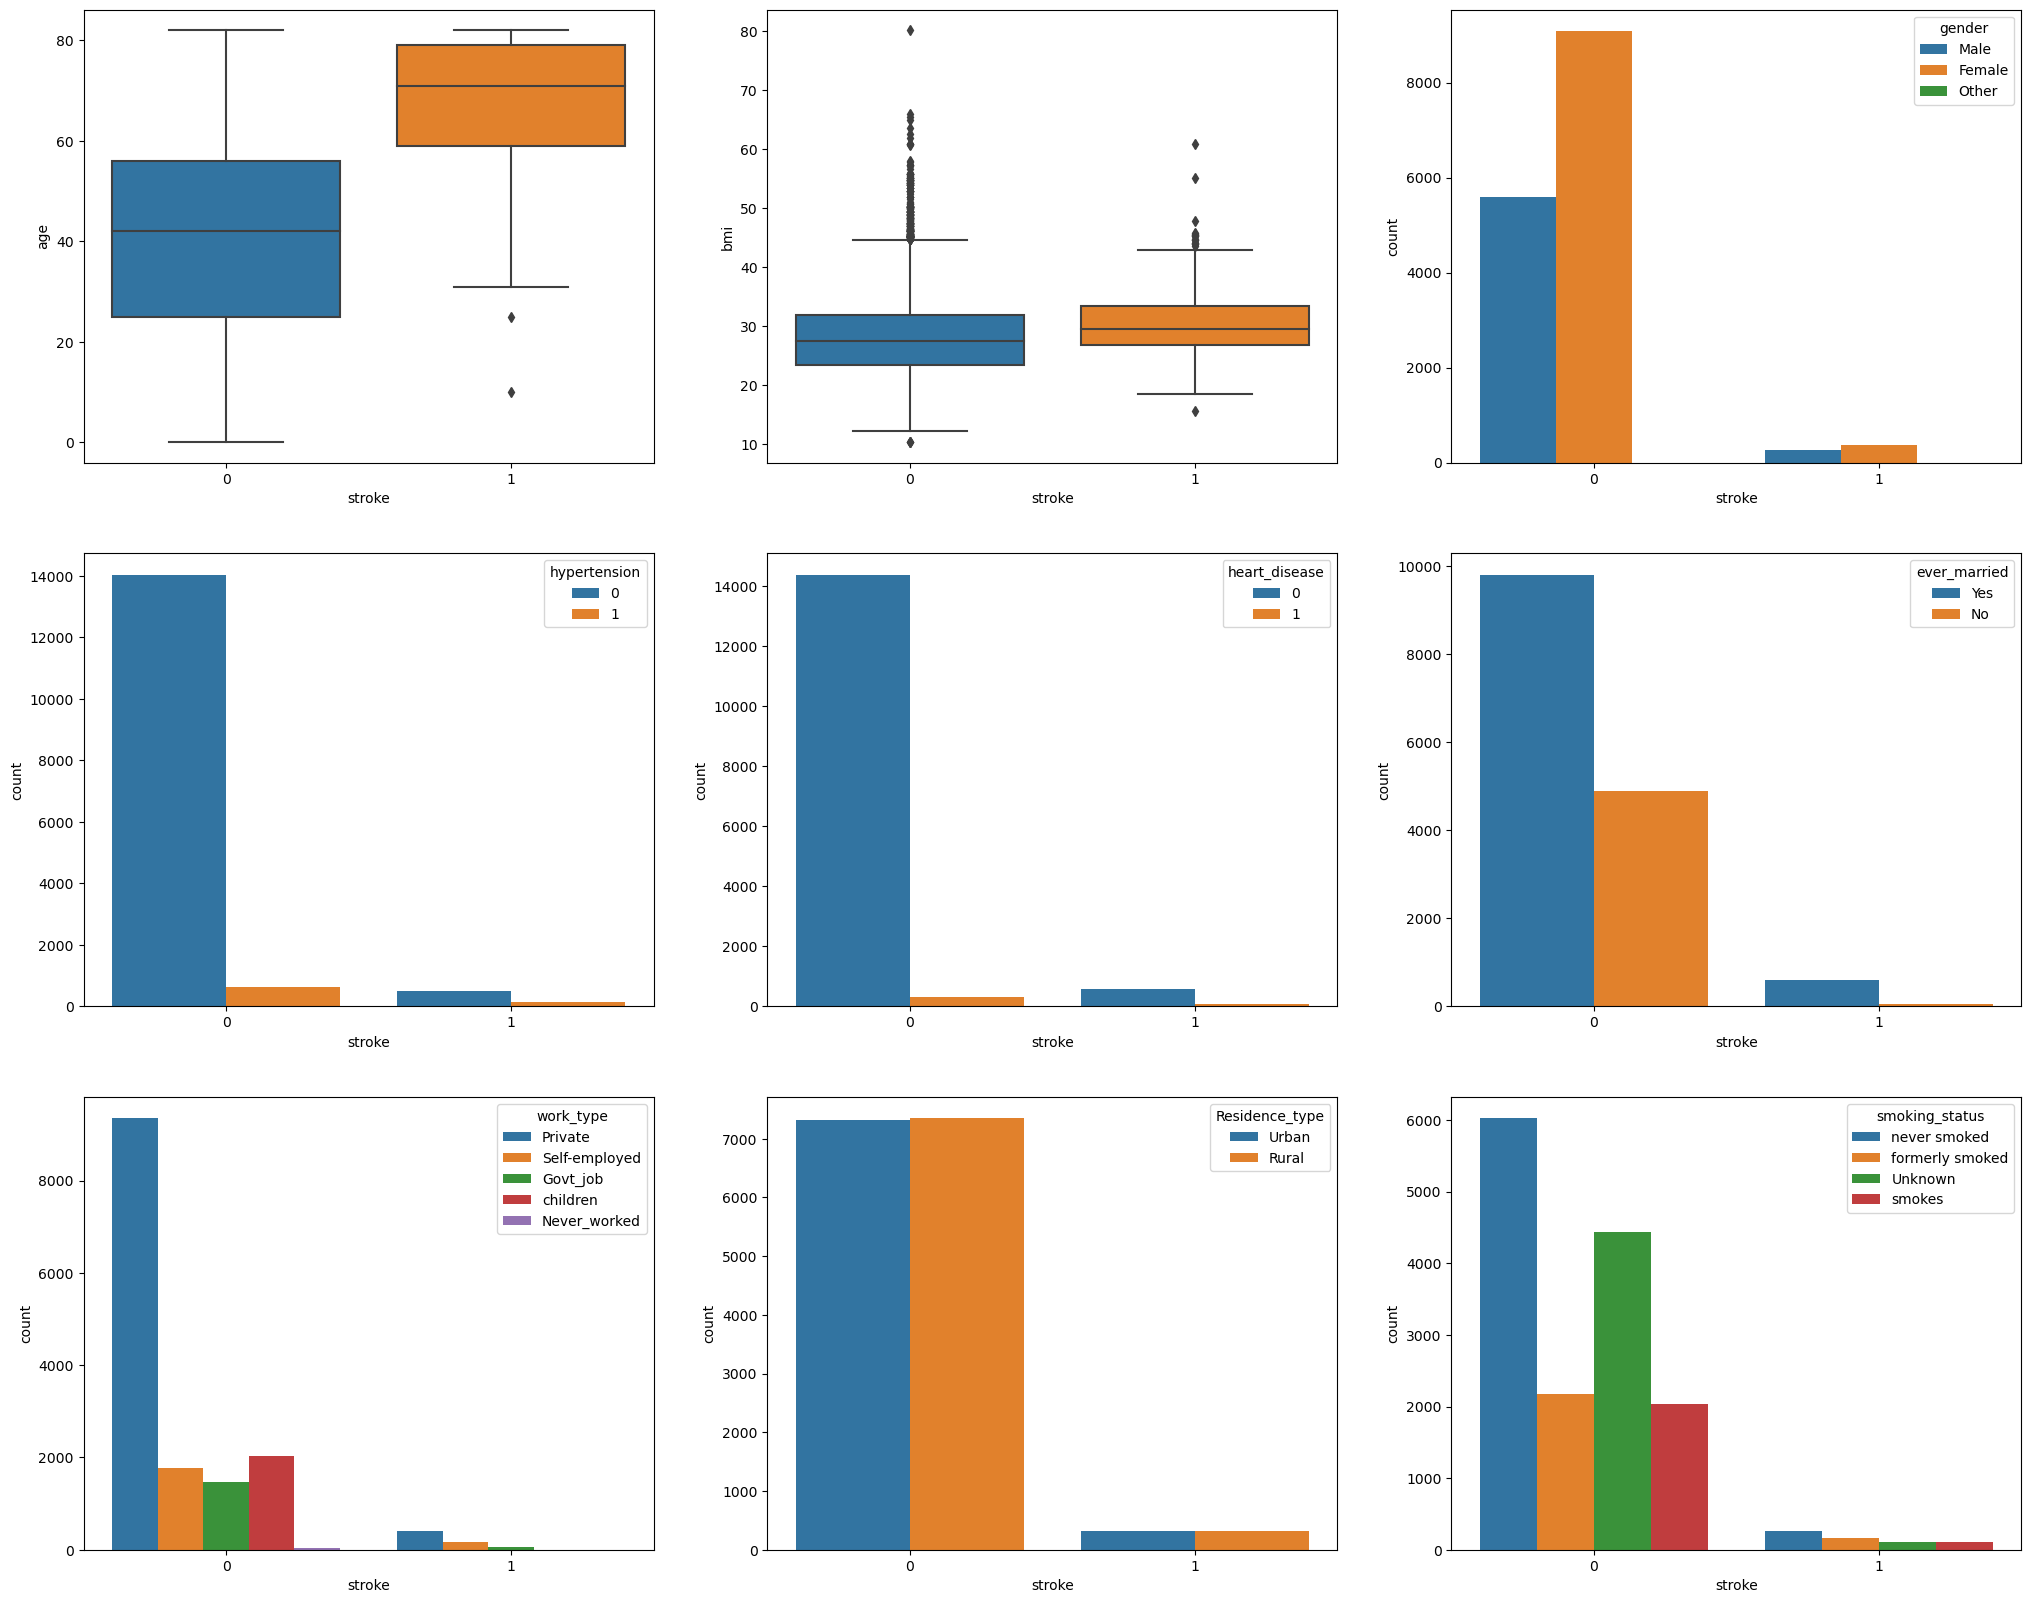

In [15]:
# Check the relationship between the features and the target variable
fig, axes = plt.subplots(3, 3, figsize=(25, 20), sharey=False)
sns.boxplot(x="stroke", y="age", data=stroke_prediction_train_data, ax=axes[0,0])
sns.boxplot(x="stroke", y="bmi", data=stroke_prediction_train_data, ax=axes[0,1])
sns.countplot(x="stroke", hue="gender", data=stroke_prediction_train_data, ax=axes[0,2])
sns.countplot(x="stroke", hue="hypertension", data=stroke_prediction_train_data, ax=axes[1,0])
sns.countplot(x="stroke", hue="heart_disease", data=stroke_prediction_train_data, ax=axes[1,1])
sns.countplot(x="stroke", hue="ever_married", data=stroke_prediction_train_data, ax=axes[1,2])
sns.countplot(x="stroke", hue="work_type", data=stroke_prediction_train_data, ax=axes[2,0])
sns.countplot(x="stroke", hue="Residence_type", data=stroke_prediction_train_data, ax=axes[2,1])
sns.countplot(x="stroke", hue="smoking_status", data=stroke_prediction_train_data, ax=axes[2,2])

## Data Preprocessing
We performed the following data preprocessing

In [16]:
cols =['gender','ever_married', 'work_type', 'smoking_status', 'Residence_type']
le = preprocessing.LabelEncoder() # one-hot encoder
for col in cols:
    stroke_prediction_train_data[col] = le.fit_transform(stroke_prediction_train_data[col])
    stroke_prediction_test_data[col] = le.transform(stroke_prediction_test_data[col])
stroke_prediction_train_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,28.0,0,0,1,2,1,79.53,31.1,1,0
1,1,33.0,0,0,1,2,0,78.44,23.9,0,0
3,1,56.0,0,0,1,2,1,64.87,28.8,1,0
4,0,24.0,0,0,0,2,0,73.36,28.8,1,0
6,0,53.0,0,0,1,2,0,88.97,25.3,1,0


In [17]:
# Split the dataset into train and test sets
X = stroke_prediction_train_data.drop(['stroke'], axis=1)
y = stroke_prediction_train_data['stroke']
X.head()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=1)

In [18]:
# predictions and accuracy score
lr = LogisticRegression(max_iter=1000) # change iter count other push
lr.fit(X_train, y_train)
pred = lr.predict(X_val)
accuracy = accuracy_score(y_val, pred)
accuracy

0.9489084997677659

In [19]:
# tuning the model
param_grid = {
    'penalty' : ['l1','l2','elasticnet','None'],
    'C': np.logspace(-4,4,20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100,150,200,250,300,350]
}

GS = GridSearchCV(
    estimator= lr,
    param_grid= param_grid,
    cv=3,
    n_jobs= -1,
)

GS.fit(X_train, y_train)

C:\Users\furka\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
4680 fits failed out of a total of 7200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\furka\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\furka\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\furka\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 150, 200, 250, 300, 350],
                         'penalty': ['l1', 'l2', 'elasticnet', 'None'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']})

In [20]:
GS.best_params_

{'C': 0.08858667904100823,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [21]:
GS.best_score_

0.9521374912001374

In [22]:
# Accuracy after tuning the parameters
tunedpredictions = GS.predict(X_val)
accuracy = accuracy_score(y_val, tunedpredictions)
accuracy

0.9498374361356247